In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Challenge Data

In [2]:
df = pd.read_csv('../data/challenge_set.csv')

In [3]:
df.columns.tolist()

['flight_id',
 'date',
 'callsign',
 'adep',
 'name_adep',
 'country_code_adep',
 'ades',
 'name_ades',
 'country_code_ades',
 'actual_offblock_time',
 'arrival_time',
 'aircraft_type',
 'wtc',
 'airline',
 'flight_duration',
 'taxiout_time',
 'flown_distance',
 'tow']

In [4]:
df

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,248763780,2022-01-01,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,London Heathrow,GB,EICK,Cork,IE,2022-01-01T13:46:00Z,2022-01-01T15:04:56Z,A320,M,a73f82288988b79be490c6322f4c32ed,61,18,321,54748.000000
1,248760618,2022-01-01,f6f610e73002b8892a239a81321f7f1d,LEBL,Barcelona,ES,KMIA,Miami,US,2022-01-01T09:55:00Z,2022-01-01T19:37:56Z,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,570,13,4193,185441.000000
2,248753824,2022-01-01,139670936660762c230ca92556ba842b,ESSA,Stockholm Arlanda,SE,KORD,Chicago O'Hare,US,2022-01-01T09:39:00Z,2022-01-01T19:08:13Z,A333,H,8be5c854fd664bcb97fb543339f74770,554,15,3770,230396.000000
3,248753852,2022-01-01,509dc61bb54fbab0e5406067c95603e2,LSZH,Zurich,CH,KPHL,Philadelphia,US,2022-01-01T11:04:00Z,2022-01-01T19:32:13Z,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,497,11,3607,157615.000000
4,248755934,2022-01-01,d0610d000dcf26b1d7bba8103ecc393d,EIDW,Dublin,IE,EGLL,London Heathrow,GB,2022-01-01T12:36:00Z,2022-01-01T13:44:32Z,A21N,M,a73f82288988b79be490c6322f4c32ed,55,14,305,70318.447226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,258058361,2022-12-31,85ee68e5b7b5acf24ba00d1318eca1e8,LFPG,Paris Charles de Gaulle,FR,KMIA,Miami,US,2022-12-31T09:38:00Z,2022-12-31T19:03:48Z,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,545,21,4046,163438.000000
369009,258071247,2022-12-31,570cf7d5ebbd691bcba63e7466607da7,LTFM,iGA Istanbul,TR,EDDB,Berlin Brandenburg,DE,2022-12-31T09:27:00Z,2022-12-31T12:29:41Z,A21N,M,6351ec1b849adacc0cbb3b1313d8d39b,158,25,946,78707.000000
369010,258059152,2022-12-31,5a7e43e4f981539ae3d3b1cb31591b7c,EDDL,Dusseldorf,DE,EIDW,Dublin,IE,2022-12-31T09:52:00Z,2022-12-31T11:41:51Z,A320,M,a73f82288988b79be490c6322f4c32ed,99,11,522,62942.750000
369011,258072276,2022-12-31,a1c078516f9f9e90cacec61854cad45b,LFPG,Paris Charles de Gaulle,FR,EIDW,Dublin,IE,2022-12-31T09:37:00Z,2022-12-31T11:13:10Z,A21N,M,a73f82288988b79be490c6322f4c32ed,84,12,466,72611.161024


In [5]:
new_df = df[['flight_duration', 'taxiout_time', 'flown_distance', 'tow']]

In [6]:
new_df

,flight_duration,taxiout_time,flown_distance,tow
0,61,18,321,54748.000000
1,570,13,4193,185441.000000
2,554,15,3770,230396.000000
3,497,11,3607,157615.000000
4,55,14,305,70318.447226
...,...,...,...,...
369008,545,21,4046,163438.000000
369009,158,25,946,78707.000000
369010,99,11,522,62942.750000
369011,84,12,466,72611.161024


In [7]:
stats_df = pd.DataFrame({
    'min': new_df.min(),
    'max': new_df.max(),
    'std': new_df.std()
})

In [8]:
stats_df

,min,max,std
flight_duration,8.0,1013.0,139.337587
taxiout_time,0.0,90.0,5.779555
flown_distance,19.0,7272.0,1128.171163
tow,14944.0,351327.0,53250.919631


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [10]:
# Apply K-Means clustering for different k values
sse = []  # Sum of Squared Errors
centroid_movements = []

prev_centers = None  # Initialize the previous centers variable

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
    if prev_centers is not None:
        # Calculate movement only if there is a previous set of centers to compare
        padded_prev_centers = np.pad(prev_centers, ((0, k - prev_centers.shape[0]), (0, 0)), 'constant')
        centroid_movement = np.mean(np.linalg.norm(kmeans.cluster_centers_ - padded_prev_centers, axis=1))
        centroid_movements.append(centroid_movement)
    
    prev_centers = kmeans.cluster_centers_

The optimal number of clusters is: 3


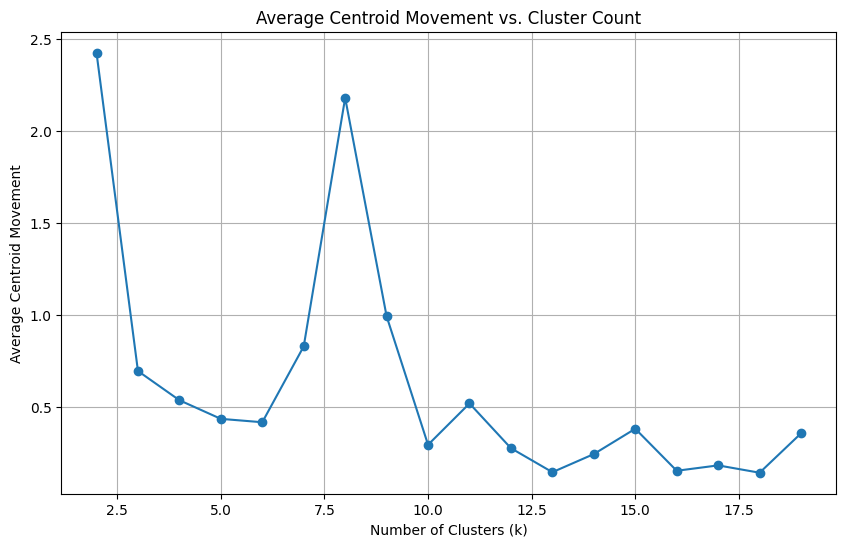

In [11]:
# Determine the optimal number of clusters using the elbow method
kneedle = KneeLocator(range(1, 20), sse, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_k}")

# Plot the average centroid movement against cluster count
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), centroid_movements, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Centroid Movement')
plt.title('Average Centroid Movement vs. Cluster Count')
plt.grid(True)
plt.show()

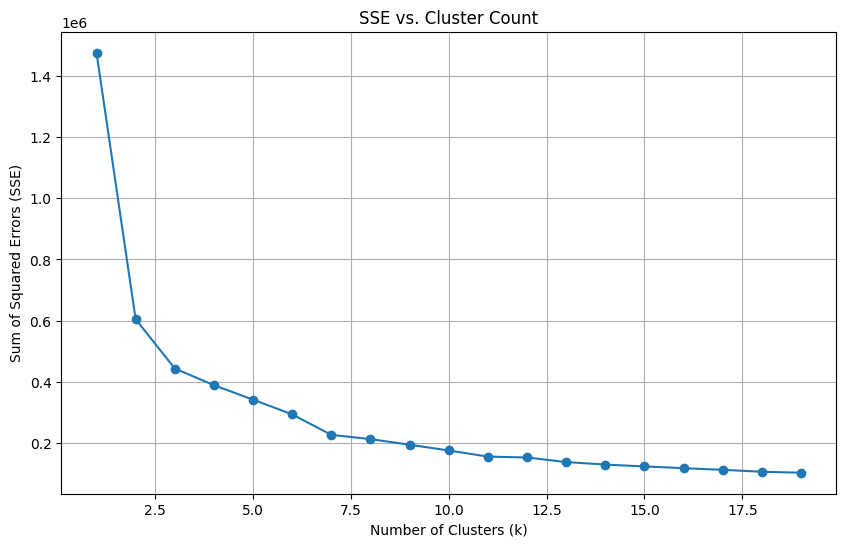

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Cluster Count')
plt.grid(True)
plt.show()

In [13]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

In [14]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

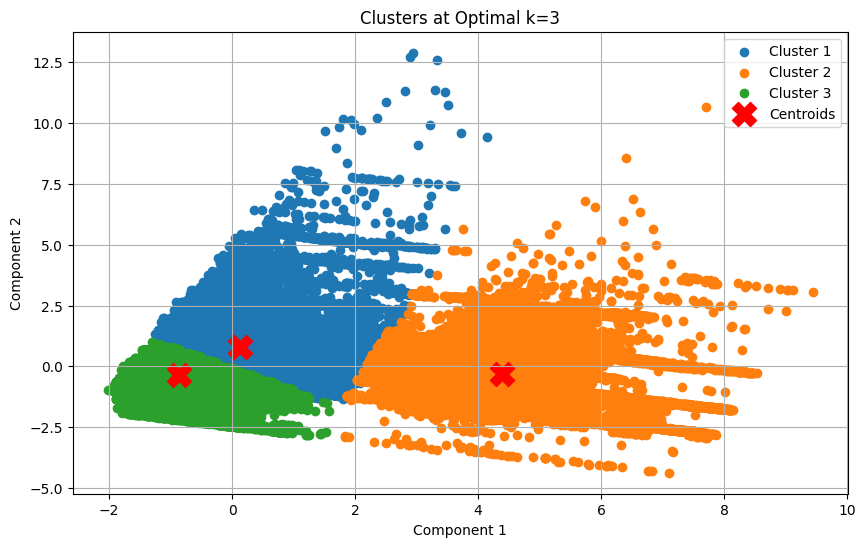

In [15]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(scaled_data)

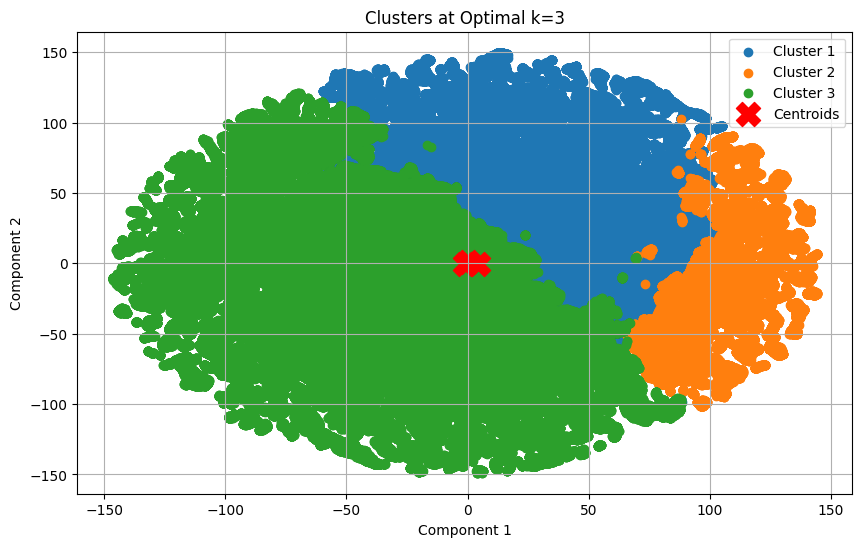

In [17]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

# Submission Data

In [18]:
df = pd.read_csv('../data/submission_set.csv')

In [19]:
df.columns.tolist()

['flight_id',
 'date',
 'callsign',
 'adep',
 'name_adep',
 'country_code_adep',
 'ades',
 'name_ades',
 'country_code_ades',
 'actual_offblock_time',
 'arrival_time',
 'aircraft_type',
 'wtc',
 'airline',
 'flight_duration',
 'taxiout_time',
 'flown_distance',
 'tow']

In [20]:
df

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,248753821,2022-01-01,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,Istanbul Sabiha Gokcen,TR,LFLL,Lyon,FR,2022-01-01T09:44:00Z,2022-01-01T12:48:33Z,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,170,15,1122,NaN
1,248753822,2022-01-01,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,Brussels,BE,KJFK,New York JFK,US,2022-01-01T09:45:00Z,2022-01-01T17:49:51Z,A333,H,bdeeef3a675587d530de70a25d7118d2,470,15,3205,NaN
2,248754498,2022-01-01,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,Miami,US,EGLL,London Heathrow,GB,2022-01-01T01:52:00Z,2022-01-01T09:55:16Z,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,473,10,3965,NaN
3,248757623,2022-01-01,81564432d3ee97c4bdf4cd8f006753dc,EGCN,Doncaster Sheffield,GB,LEAL,Alicante,ES,2022-01-01T08:20:00Z,2022-01-01T11:06:08Z,B38M,M,3922524069809ac4326134429751e26f,156,10,986,NaN
4,248763603,2022-01-01,84be079d7e660db105d91f600b4b3d59,EIDW,Dublin,IE,LFLL,Lyon,FR,2022-01-01T11:01:00Z,2022-01-01T13:00:43Z,A320,M,a73f82288988b79be490c6322f4c32ed,105,15,686,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105954,258066302,2022-12-31,2d3b4446c4d05a25196a9d52cab936fb,LTFJ,Istanbul Sabiha Gokcen,TR,EKCH,Copenhagen,DK,2022-12-31T09:36:00Z,2022-12-31T13:12:17Z,B38M,M,6351ec1b849adacc0cbb3b1313d8d39b,201,15,1199,NaN
105955,258068609,2022-12-31,253fd692ed441fac523081471c067772,LOWW,Vienna,AT,KIAD,Washington Dulles,US,2022-12-31T09:49:00Z,2022-12-31T19:38:26Z,B763,H,5d407cb11cc29578cc3e292e743f5393,575,14,3937,NaN
105956,258068876,2022-12-31,c9fca302ca2e28acab0eb0bb1b46f11b,LTFM,iGA Istanbul,TR,LSZH,Zurich,CH,2022-12-31T09:25:00Z,2022-12-31T12:24:24Z,A321,M,6351ec1b849adacc0cbb3b1313d8d39b,154,25,988,NaN
105957,258064675,2022-12-31,00f96ad0e382476649574ba044c764fc,EHAM,Amsterdam,NL,EDDF,Frankfurt,DE,2022-12-31T10:04:21Z,2022-12-31T10:55:35Z,A320,M,f502877cab405652cf0dd70c2213e730,42,9,240,NaN


In [21]:
stats_df = pd.DataFrame({
    'min': new_df.min(),
    'max': new_df.max(),
    'std': new_df.std()
})

In [22]:
stats_df

,min,max,std
flight_duration,8.0,1013.0,139.337587
taxiout_time,0.0,90.0,5.779555
flown_distance,19.0,7272.0,1128.171163
tow,14944.0,351327.0,53250.919631


In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [24]:
# Apply K-Means clustering for different k values
sse = []  # Sum of Squared Errors
centroid_movements = []

prev_centers = None  # Initialize the previous centers variable

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
    if prev_centers is not None:
        # Calculate movement only if there is a previous set of centers to compare
        padded_prev_centers = np.pad(prev_centers, ((0, k - prev_centers.shape[0]), (0, 0)), 'constant')
        centroid_movement = np.mean(np.linalg.norm(kmeans.cluster_centers_ - padded_prev_centers, axis=1))
        centroid_movements.append(centroid_movement)
    
    prev_centers = kmeans.cluster_centers_

The optimal number of clusters is: 3


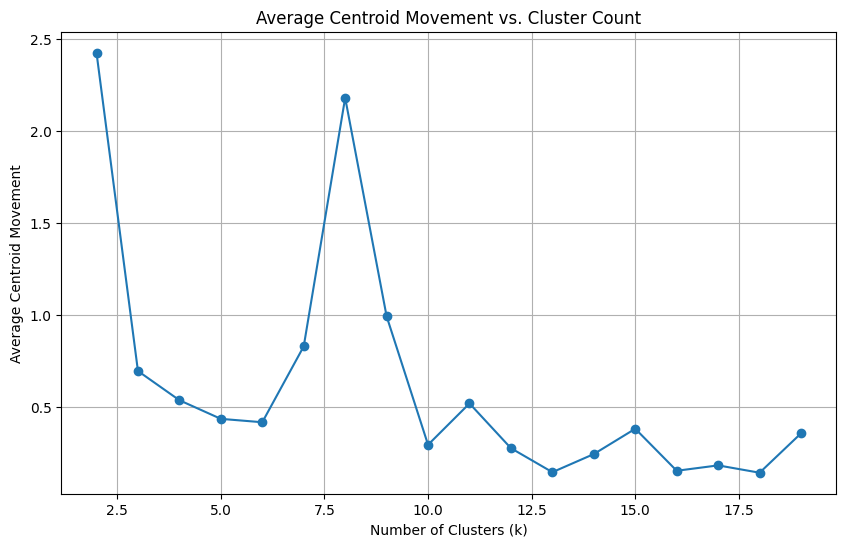

In [25]:
# Determine the optimal number of clusters using the elbow method
kneedle = KneeLocator(range(1, 20), sse, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_k}")

# Plot the average centroid movement against cluster count
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), centroid_movements, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Centroid Movement')
plt.title('Average Centroid Movement vs. Cluster Count')
plt.grid(True)
plt.show()

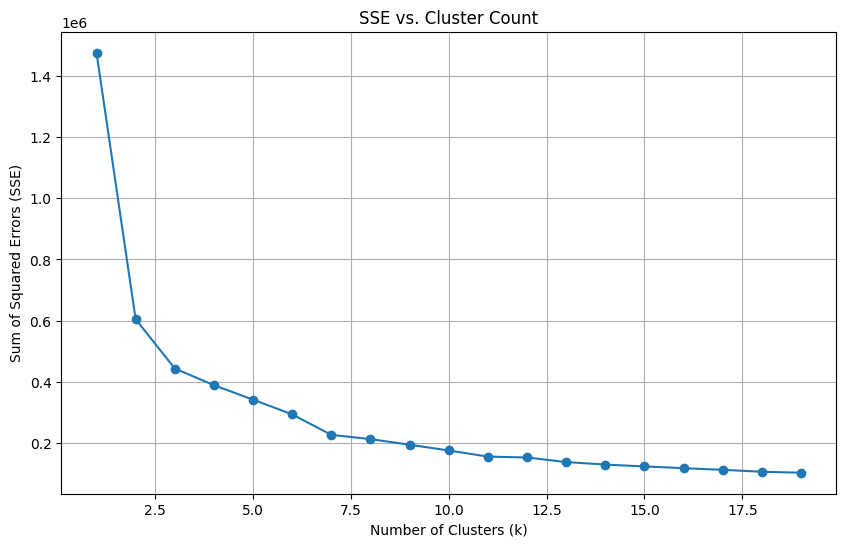

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Cluster Count')
plt.grid(True)
plt.show()

In [27]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

In [28]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

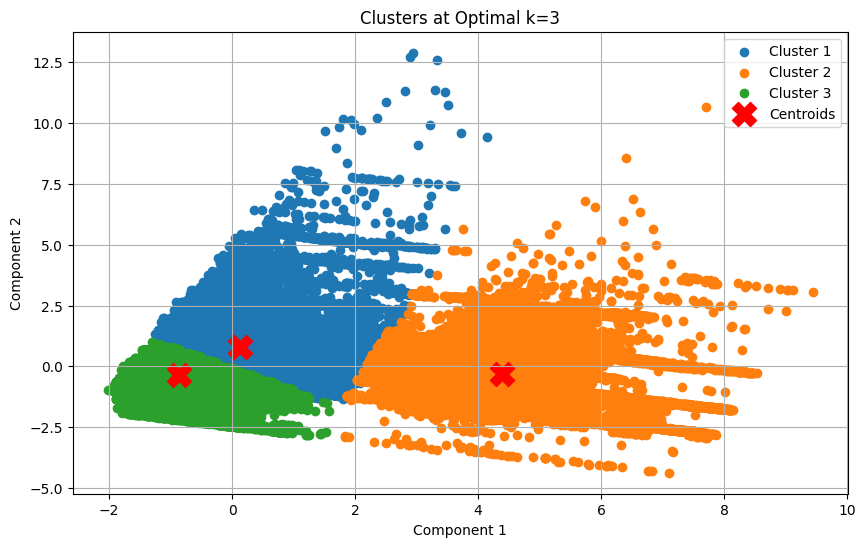

In [29]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(scaled_data)

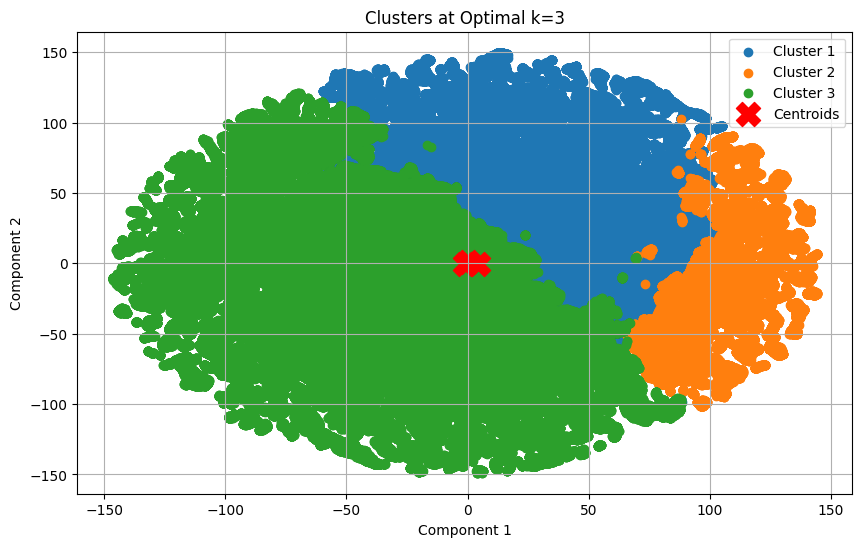

In [31]:
plt.figure(figsize=(10, 6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
centroids = pca.transform(kmeans.cluster_centers_) if isinstance(reduced_data, np.ndarray) else kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Clusters at Optimal k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()